In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product           #Cartesian product of input iterables
from tqdm import tqdm_notebook          #Experimental IPython/Jupyter Notebook widget using tqdm!


In [2]:
data= pd.read_excel('_employment_time_series_2.xlsx')
data.head()

,Unnamed: 0,Key Labour Force Measures by Sex,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Females,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Qualification,Total Qualifications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Total Qualifications,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Quarter,Total Employed (000),Total Unemployed (000),Total Labour Force (000),Not in the Labour Force (000),Working-age Population (000),Labour Force Participation Rate (%),Employment Rate (%),Total Unemploy-ment Rate (%),...,Employment Rate (%),Male Unemploy-ment Rate (%),Female Employed (000),Female Unemployed (000),Total Labour Force (000),Not in the Labour Force (000),Female Working-age Population (000),Labour Force Participation Rate (%),Employment Rate (%),Female Unemploy-ment Rate (%)
4,1990Q2,Jun 90,1540.9,127.2,1668.1,939.4,2607.5,64,59.1,7.6,...,68.2,8.3,677.8,49.1,726.9,614.8,1341.7,54.2,50.5,6.8


In [3]:
data.columns= data.iloc[3,:]
data= data.iloc[4:,:]

In [4]:
data.index= data['Quarter']
raw_data=data.iloc[:,2:]

In [5]:
raw_data.head()

3,Total Employed (000),Total Unemployed (000),Total Labour Force (000),Not in the Labour Force (000),Working-age Population (000),Labour Force Participation Rate (%),Employment Rate (%),Total Unemploy-ment Rate (%),Male Employed (000),Male Unemployed (000),...,Employment Rate (%),Male Unemploy-ment Rate (%),Female Employed (000),Female Unemployed (000),Total Labour Force (000),Not in the Labour Force (000),Female Working-age Population (000),Labour Force Participation Rate (%),Employment Rate (%),Female Unemploy-ment Rate (%)
Quarter,,,,,,,,,,,,,,,,,,,,,
Jun 90,1540.9,127.2,1668.1,939.4,2607.5,64,59.1,7.6,863.1,78.1,...,68.2,8.3,677.8,49.1,726.9,614.8,1341.7,54.2,50.5,6.8
Sep 90,1526.3,131.5,1657.8,955.9,2613.7,63.4,58.4,7.9,856.8,78.4,...,67.5,8.4,669.5,53.1,722.6,622.2,1344.8,53.7,49.8,7.4
Dec 90,1538.3,148.3,1686.6,937.5,2624.1,64.3,58.6,8.8,864,88,...,67.8,9.2,674.3,60.3,734.6,615.6,1350.2,54.4,49.9,8.2
Mar 91,1519.7,173.1,1692.8,942.3,2635.1,64.2,57.7,10.2,853,99.1,...,66.7,10.4,666.7,73.9,740.6,615,1355.7,54.6,49.2,10
Jun 91,1512.2,174,1686.1,956.3,2642.4,63.8,57.2,10.3,844.2,102.1,...,65.8,10.8,668,71.9,739.8,619.3,1359.2,54.4,49.1,9.7


In [6]:
data.index

Index(['Jun 90', 'Sep 90', 'Dec 90', 'Mar 91', 'Jun 91', 'Sep 91', 'Dec 91',
       'Mar 92', 'Jun 92', 'Sep 92', 'Dec 92', 'Mar 93', 'Jun 93', 'Sep 93',
       'Dec 93', 'Mar 94', 'Jun 94', 'Sep 94', 'Dec 94', 'Mar 95', 'Jun 95',
       'Sep 95', 'Dec 95', 'Mar 96', 'Jun 96', 'Sep 96', 'Dec 96', 'Mar 97',
       'Jun 97', 'Sep 97', 'Dec 97', 'Mar 98', 'Jun 98', 'Sep 98', 'Dec 98',
       'Mar 99', 'Jun 99', 'Sep 99', 'Dec 99', 'Mar 00', 'Jun 00', 'Sep 00',
       'Dec 00', 'Mar 01', 'Jun 01', 'Sep 01', 'Dec 01', 'Mar 02', 'Jun 02',
       'Sep 02', 'Dec 02', 'Mar 03', 'Jun 03', 'Sep 03', 'Dec 03', 'Mar 04',
       'Jun 04', 'Sep 04', 'Dec 04', 'Mar 05', 'Jun 05', 'Sep 05', 'Dec 05',
       'Mar 06', 'Jun 06', 'Sep 06', 'Dec 06', 'Mar 07', 'Jun 07', 'Sep 07',
       'Dec 07', 'Mar 08', 'Jun 08', 'Sep 08', 'Dec 08', 'Mar 09', 'Jun 09',
       'Sep 09', 'Dec 09', 'Mar 10', 'Jun 10', 'Sep 10', 'Dec 10', 'Mar 11',
       'Jun 11', 'Sep 11', 'Dec 11', 'Mar 12', 'Jun 12', 'Sep 12'],
      dt

In [7]:
index= pd.date_range('Jun 1990' ,periods=90 ,freq='Q')
data.index=index
raw_data.index=index

In [8]:
raw_data.index.name=None

In [9]:
raw_data.head()

3,Total Employed (000),Total Unemployed (000),Total Labour Force (000),Not in the Labour Force (000),Working-age Population (000),Labour Force Participation Rate (%),Employment Rate (%),Total Unemploy-ment Rate (%),Male Employed (000),Male Unemployed (000),...,Employment Rate (%),Male Unemploy-ment Rate (%),Female Employed (000),Female Unemployed (000),Total Labour Force (000),Not in the Labour Force (000),Female Working-age Population (000),Labour Force Participation Rate (%),Employment Rate (%),Female Unemploy-ment Rate (%)
1990-06-30,1540.9,127.2,1668.1,939.4,2607.5,64,59.1,7.6,863.1,78.1,...,68.2,8.3,677.8,49.1,726.9,614.8,1341.7,54.2,50.5,6.8
1990-09-30,1526.3,131.5,1657.8,955.9,2613.7,63.4,58.4,7.9,856.8,78.4,...,67.5,8.4,669.5,53.1,722.6,622.2,1344.8,53.7,49.8,7.4
1990-12-31,1538.3,148.3,1686.6,937.5,2624.1,64.3,58.6,8.8,864,88,...,67.8,9.2,674.3,60.3,734.6,615.6,1350.2,54.4,49.9,8.2
1991-03-31,1519.7,173.1,1692.8,942.3,2635.1,64.2,57.7,10.2,853,99.1,...,66.7,10.4,666.7,73.9,740.6,615,1355.7,54.6,49.2,10
1991-06-30,1512.2,174,1686.1,956.3,2642.4,63.8,57.2,10.3,844.2,102.1,...,65.8,10.8,668,71.9,739.8,619.3,1359.2,54.4,49.1,9.7


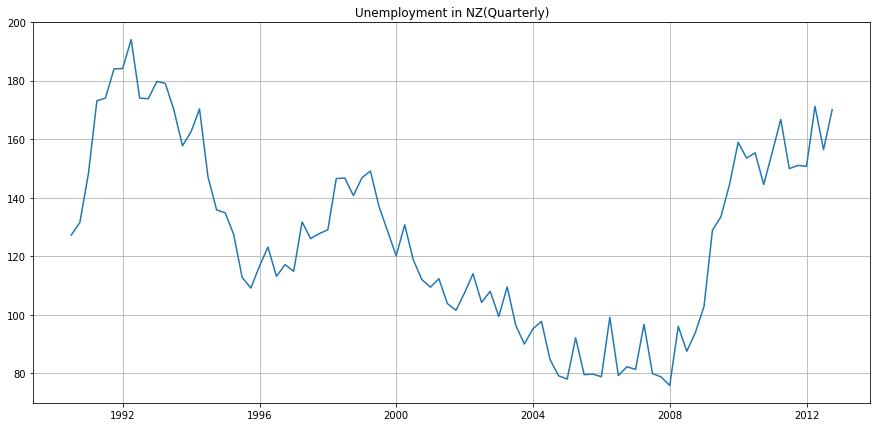

In [10]:
plt.figure(figsize=(15,7))
plt.plot(raw_data['Total Unemployed (000)'])
plt.grid(True)
plt.title('Unemployment in NZ(Quarterly)')
plt.show()

#### Just important Observations:


1. There is not much variance change


2. Also seasonality and trend are also missing


3. yt= trend + seasonality + cyclic + Noise ==> so if first two are missing then this series is most probably a stationary series

### Forecast Metrics:

#### R-Squared, MAE(Mean absolute), MSE,MAE (Median Absolute),MAPE(Mean Absolute percentage Error)

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error

In [18]:
def mean_absolute_percentage_error(y_true,y_pred):
    
    return np.mean(np.abs((y_true-y_pred)/y_true)) * 100

def metrics(y_true,y_pred):
    
    r2= r2_score(y_true,y_pred)
    mae= mean_absolute_error(y_true,y_pred)
    median_error=median_absolute_error(y_true,y_pred)
    mean_squared= mean_squared_error(y_true,y_pred)
    mean_squared_log= mean_squared_log_error(y_true,y_pred)
    mape=mean_absolute_percentage_error(y_true,y_pred)
    
    print('R2_Score:{} \n'.format(r2),
                 'Mean_Absolute_Error:{} \n'.format(mae),
                  'Median_Absolute_error:{} \n'.format(median_error),
                   'Mean_squared_Error:{}\n'.format(mean_squared),
                    'Mean_squared_Log_Error:{}\n'.format(mean_squared_log),
                    'MAPE :{}'.format(mape))

### Some Imporant Points:

__1. If we have large amount of data and we need easy and quick fix then we can use NAIVE forecasting methods with moving Average, Expanding Window and Smoothing Windows. In this quick game, we can also use traditional ML models by extracting lagged features from time series and develop linear regression or Random Forest Models.__

__2. If we need proper forecasting and Econometrics approach, then we need ARIMA,SARIMA and FB Prophet for forecasting. They are time Consuming and require alot of parameter tunning and are far better than naive approach__

<font color=green>__Naive Forecasting Methods__</font>

<font color=blue>1. Moving Average Window</font>

In [13]:
def plot_moving_average(series,window,plot_intervals=False,scale=1.96,plot_anomalies=False):
    
    rolling_window= series.rolling(window).mean()         ### Create a window and when using apply as r.mean() or r.std() or r.agg()
    
    plt.figure(figsize=(15,7))
    plt.plot(rolling_window,label='rolling_mean_trend')
    plt.title("Moving Average with window size:{}".format(window))
    
    if plot_intervals:
        
        mae=mean_absolute_error(series[window:],rolling_window[window:])
        std=np.std(series[window:] - rolling_window[window:])
        upper_bound= rolling_window + (mae + scale *std)
        lower_bound= rolling_window - (mae + scale *std)
        plt.plot(upper_bound,'r--',label='Upper Bound / Lower Bound')
        plt.plot(lower_bound,'r--')
        
        if plot_anomalies:

            anomalies = pd.DataFrame(index=series.index)
            anomalies[series<lower_bound] = series[series<lower_bound]
            anomalies[series>upper_bound] = series[series>upper_bound]
            plt.plot(anomalies, markersize=10)
            
    plt.plot(series[window:],label='Actual Series')
    plt.legend(loc='best')
    plt.grid(True)
    

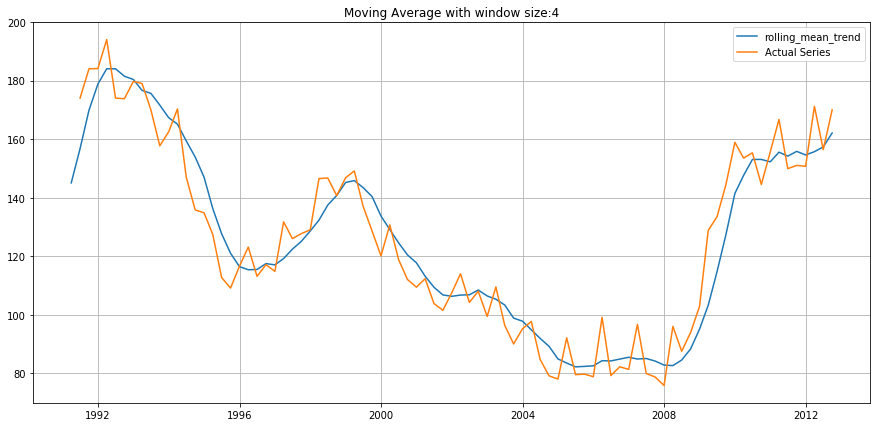

In [14]:
plot_moving_average(raw_data['Total Unemployed (000)'],window=4)

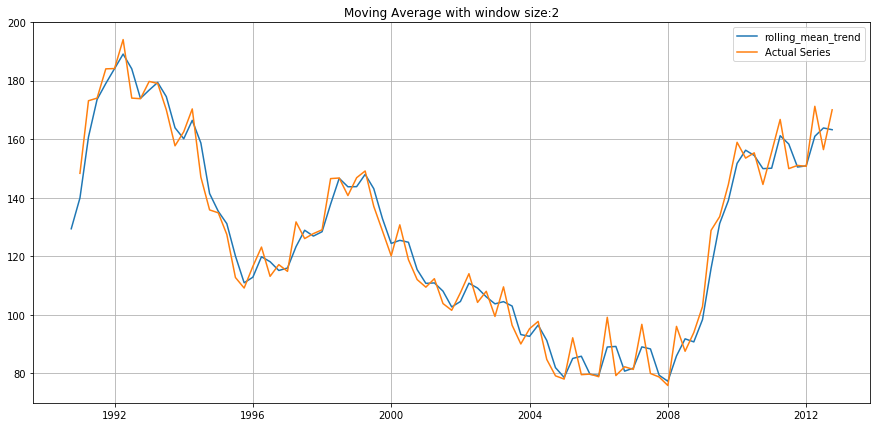

In [15]:
plot_moving_average(raw_data['Total Unemployed (000)'],window=2)

#### The larger the window, the smoother the rolling mean trend

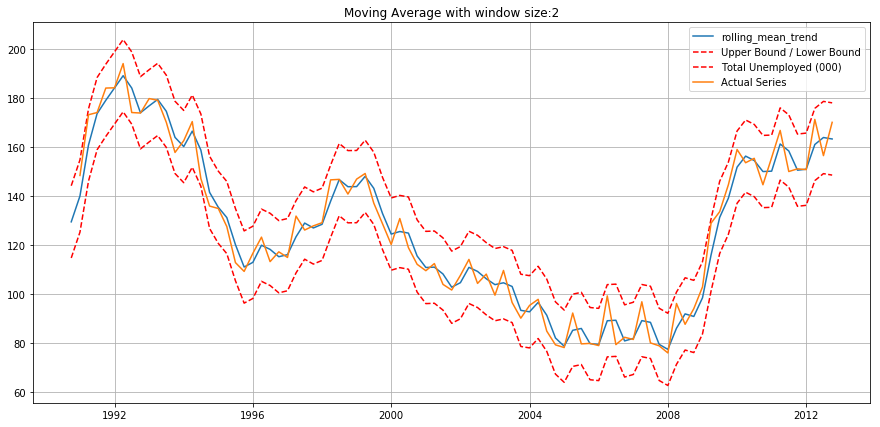

In [16]:
plot_moving_average(raw_data['Total Unemployed (000)'],window=2,plot_intervals=True)

<font color=blue> 2. Weighted Average</font>

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

__Exponential Smoothing idea is from weighted average which means as the values become older the weights decrease exponentially and smoothing level is a factor between 0 and 1 where closer to 0 means more attention to past values__

Instead of using Statsmodels API we shall write our own code for this simple exponential smoothing

<font color=orange> i) Simple Exponential Smoothing </font>

In [17]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [18]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

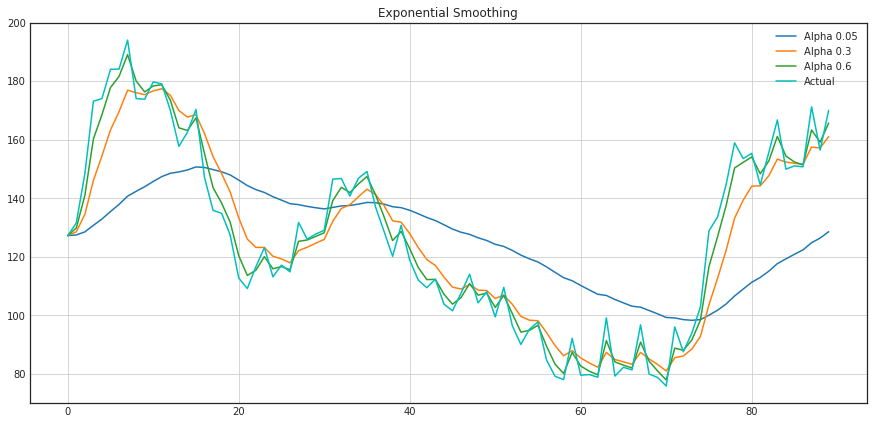

In [19]:
plotExponentialSmoothing(raw_data['Total Unemployed (000)'], alphas=[0.05, 0.3,0.6])

In [20]:
metrics(raw_data['Total Unemployed (000)'],exponential_smoothing(raw_data['Total Unemployed (000)'],alpha=0.3))

R2_Score:0.8915199670233773 
 Mean_Absolute_Error:8.11130467639346 
 Median_Absolute_error:6.3263568820026705 
 Mean_squared_Error:108.24665144434421
 Mean_squared_Log_Error:0.006422984507695135
 MAPE :6.460849605988433


In [21]:
metrics(raw_data['Total Unemployed (000)'],exponential_smoothing(raw_data['Total Unemployed (000)'],alpha=0.5))

R2_Score:0.9646398692226656 
 Mean_Absolute_Error:4.7533801515807035 
 Median_Absolute_error:4.073174647965146 
 Mean_squared_Error:35.28405777776066
 Mean_squared_Log_Error:0.0021889879724981275
 MAPE :3.816283619889659


__Since this series is without any visible trend and seasonality and Simple Exponential method is largely suitable only for time series without trend and seasonality. That's why we are getting such good results here otherwise to account for trend and seasonality we hace to use double and triple exponential smoothing__

In [3]:
currency=pd.read_csv('currency.csv',index_col=['Time'],parse_dates=['Time'])
currency.head()


,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


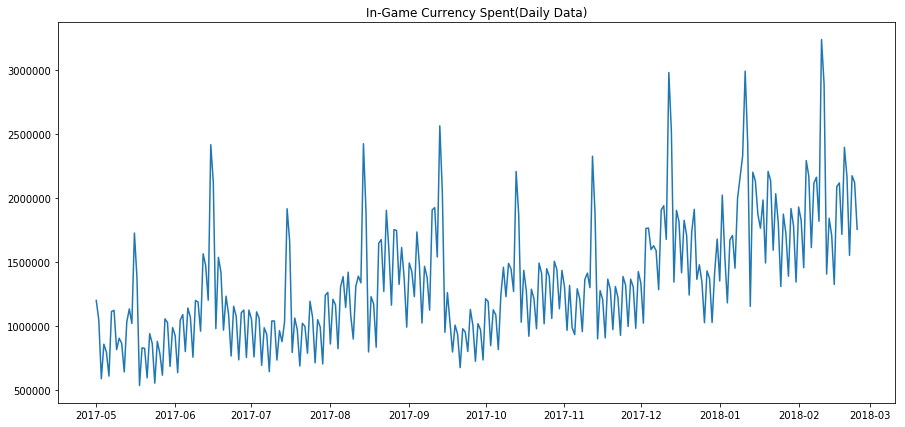

In [4]:
plt.figure(figsize=(15,7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-Game Currency Spent(Daily Data)')
plt.show()

<font color=orange>ii) Double  and Triple Exponential Smoothing </font>

Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

Triple Add's seasonality factor into the series and its trend type.

Statsmodels exponentialsmoothing can help us in bith double and triple exponential smoothing 

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

__Additive Trend: Double Exponential Smoothing with a linear trend.__

__Multiplicative Trend: Double Exponential Smoothing with an exponential trend.__

_Alpha: Smoothing factor for the level_

_Beta: Smoothing factor for the trend_

_Trend Type: Additive or multiplicative_

_Dampen Type: Additive or multiplicative_

_Phi: Damping coefficient_

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def exponential_smoothing(series,alpha,beta,trend_type,s_periods,seasonal):        
    
    model=ExponentialSmoothing(series.values,trend=trend_type,seasonal_periods=s_periods,seasonal=seasonal)
    model_fit= model.fit(alpha,beta)
    result=model_fit.forecast(len(series))
    return result

In [25]:
def plot_exponential_smoothing(series,alphas,betas,trend_type,s_periods,seasonal):     ## we can also create a loop for trendtype to check which suits better
     
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15,7))
        
        for alpha in alphas:
            for beta in betas:
                plt.plot(exponential_smoothing(series,alpha,beta,trend_type,s_periods,seasonal),label='ALPHA {} , BETA {}'.format(alpha,beta))
                
        plt.plot(series.values,label='Actual')
        plt.legend(loc='best')
        plt.grid(True)
        plt.title('Double Exponential Smoothing')
                    

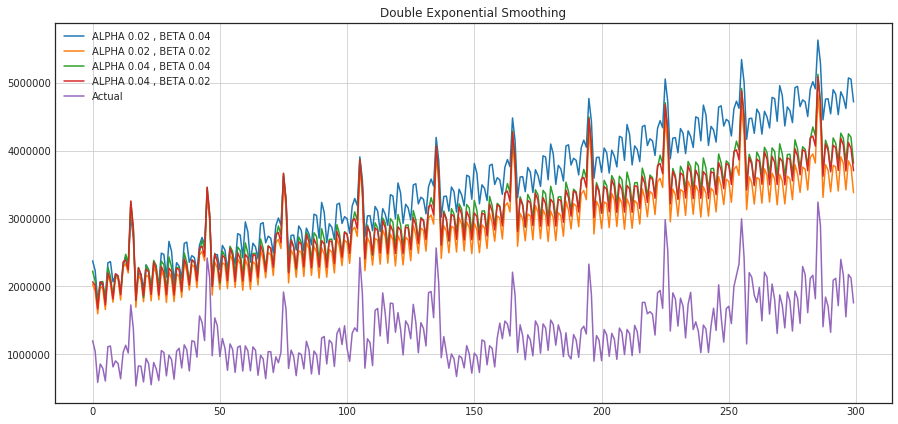

In [26]:
plot_exponential_smoothing(currency.GEMS_GEMS_SPENT,alphas=[0.02,0.04],betas=[0.04,0.02],trend_type='add',s_periods=30,seasonal='add')

__Instead of plotting and creating a mess, we should use grid search and find the best parameters for Exponential Smoothing__

In [27]:
def grid_search_exponential_smoothing(series,alphas,betas,trends,s_periods,seasons):
    
    for alpha in alphas:
        for beta in betas:
            for trend in trends:
                for season in seasons:
                    result=exponential_smoothing(series,alpha,beta,trend_type=trend,s_periods=s_periods,seasonal=season)
                    mae= mean_absolute_error(series.values,result)
                    mape=mean_absolute_percentage_error(series.values,result)
                    
                    print("Alpha :{} , Beta :{}, Normal_trend :{}, Seasonal_trend :{}\n , MAE :{} , MAPE :{}"
                          .format(alpha,beta,trend,season,mae,mape))

In [28]:
grid_search_exponential_smoothing(currency.GEMS_GEMS_SPENT,alphas=[0.007,0.002,0.01],betas=[0.003,0.007,0.02],
                                  trends=['add'],s_periods=30,seasons=['add','mul'])

Alpha :0.007 , Beta :0.003, Normal_trend :add, Seasonal_trend :add
 , MAE :1038371.002433573 , MAPE :88.79635198559703
Alpha :0.007 , Beta :0.003, Normal_trend :add, Seasonal_trend :mul
 , MAE :1237407.4128183452 , MAPE :100.45072848757862
Alpha :0.007 , Beta :0.007, Normal_trend :add, Seasonal_trend :add
 , MAE :1039204.2406221678 , MAPE :88.74755224792494
Alpha :0.007 , Beta :0.007, Normal_trend :add, Seasonal_trend :mul
 , MAE :1180319.6621584117 , MAPE :96.39459562240631
Alpha :0.007 , Beta :0.02, Normal_trend :add, Seasonal_trend :add
 , MAE :733077.8270969571 , MAPE :66.55057802230475
Alpha :0.007 , Beta :0.02, Normal_trend :add, Seasonal_trend :mul
 , MAE :1017745.3437958264 , MAPE :82.07116783522689
Alpha :0.002 , Beta :0.003, Normal_trend :add, Seasonal_trend :add
 , MAE :2625321.949638393 , MAPE :216.95006852158954
Alpha :0.002 , Beta :0.003, Normal_trend :add, Seasonal_trend :mul
 , MAE :1770987.943722444 , MAPE :139.32665632996313
Alpha :0.002 , Beta :0.007, Normal_trend :a

__Lets Plot top one:__


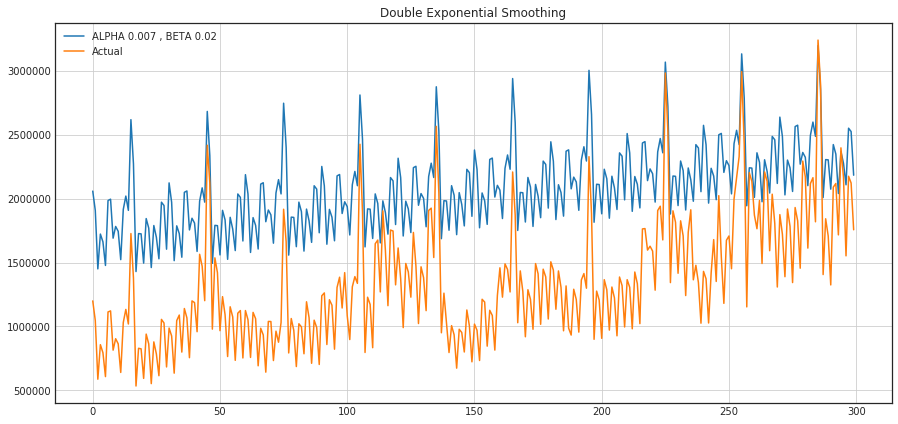

In [29]:
plot_exponential_smoothing(series=currency.GEMS_GEMS_SPENT,alphas=[0.007],betas=[0.02],trend_type='add',s_periods=30,seasonal='add')

### We can repeat this process to find a better fit. But this is the limit of Exponential Smoothing. We cannot get a better fit from it. We have to use Arima Models for that.








## Econometric Approach to Time Series

__Steps needed for ARIMA (or SARIMA)  model__

_1. Observe plot_

_2.Check the series for stationarity through KSS and dicky Fuller test_

_3.perform Transformations such Box-C0x and differencing to remove stationarity_

_4.Get initial Values of p and q from PACF and ACF plots_

_5.Fit the model and perform Grid Search for best paramters_

_6.Check for unbaisdness of error_

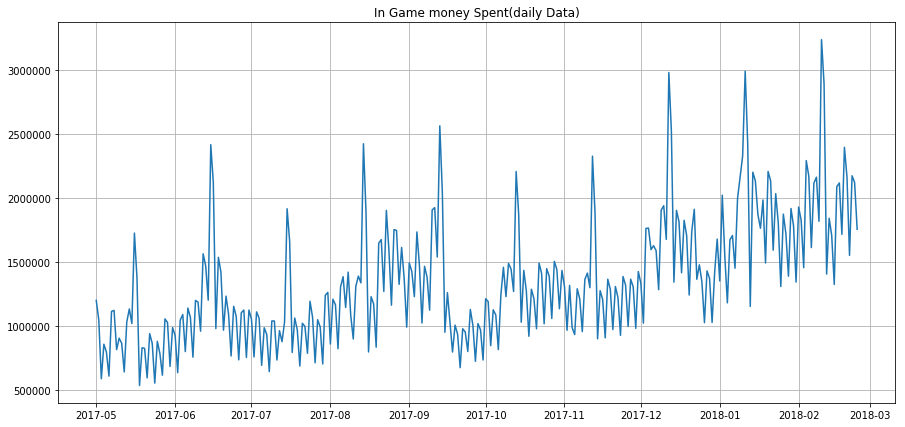

In [30]:
plt.figure(figsize=(15,7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title("In Game money Spent(daily Data)")
plt.grid(True)
plt.show()

#### Observations:

1. A strong seaosnality component is there (We can check it by decomposing it through statsmodels method)

2. Variance is also increased in 2018

3. A linear trend is also being depicted

4. So, Visaual Aanalysis concludes that the series is not stationary.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
result=seasonal_decompose(currency.GEMS_GEMS_SPENT)

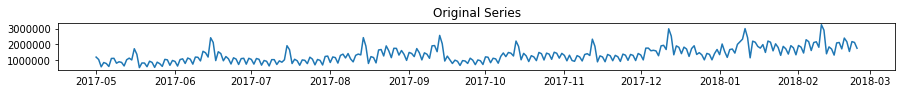

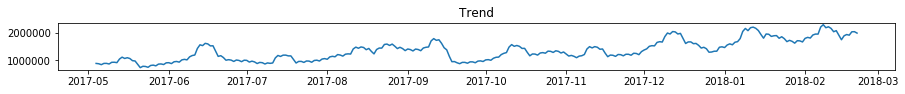

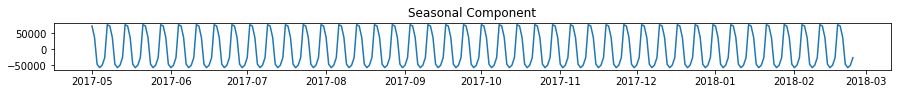

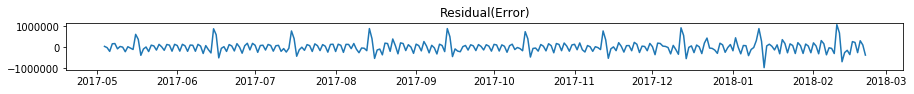

In [33]:
plt.figure(figsize=(15,4))
plt.subplot(4,1,1)
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title("Original Series")

plt.figure(figsize=(15,4))
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.title('Trend')

plt.figure(figsize=(15,4))
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.figure(figsize=(15,4))
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.title('Residual(Error)')

plt.show()

__So our earlier observations about trend and seasonality are true__

#### We are going to test stationarity by using Dicky Fuller test and KPSS test.

1. Dicky fuller Test (Ho= Series is not stationary) Hence if p-value is < 0.05 than series is stationary otherwise not

2. Kpss test (Ho= Series is trend stationary) Hence if p<0.05 than series is not stationary otherwise is trend statinary

Case 1: Both tests conclude that the series is not stationary -> series is not stationary

Case 2: Both tests conclude that the series is stationary -> series is stationary

Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary

Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller,kpss

In [35]:
def stationary_check(series):
    
    ad_fuller_test= adfuller(series)
    kpss_test= kpss(series)
    
    
    with plt.style.context('seaborn-white'):
        fig=plt.figure(figsize=(12,5))
        ax=fig.gca()
        plot_acf(series,ax=ax,lags=90)        ###Plot upto three seasons
        
        fig_1=plt.figure(figsize=(12,5))
        ax_1=fig_1.gca()
        plot_pacf(series,ax=ax_1,lags=90)
        plt.grid(True)
        
    print('Dickey_Fuller Test Results [Ho=Series is Not Stationary] \n Test Statistic :{} \n P-Value :{} \n Critical Values :{}\n\n'.format(
        ad_fuller_test[0],ad_fuller_test[1],ad_fuller_test[4]))
   

    print('KPSS Test Result [Ho=Series is trend Stationary] \n Test Statistic :{} \n P-Value :{} \n Critical Values :{}'.format(
         kpss_test[0],kpss_test[1],kpss_test[3]))

C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Dickey_Fuller Test Results [Ho=Series is Not Stationary] 
 Test Statistic :-1.8160113962890994 
 P-Value :0.37254195189458084 
 Critical Values :{'1%': -3.4535050041524245, '5%': -2.8717352599720294, '10%': -2.5722024776854417}


KPSS Test Result [Ho=Series is trend Stationary] 
 Test Statistic :1.3364930770468224 
 P-Value :0.01 
 Critical Values :{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


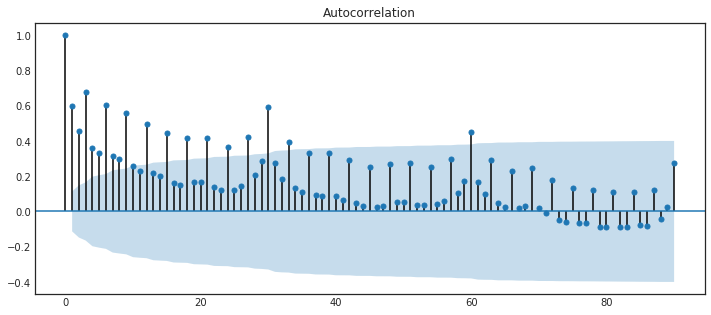

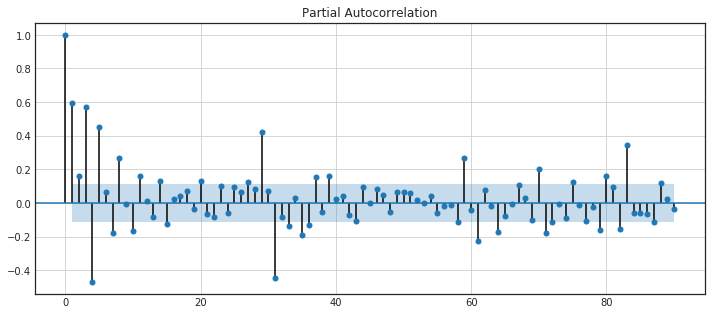

In [36]:
stationary_check(currency.GEMS_GEMS_SPENT)

__Hence the series is not stationary from both tests__

__To remove, seasonality we have to do differencing with series of lag 30__

C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Dickey_Fuller Test Results [Ho=Series is Not Stationary] 
 Test Statistic :-3.849643384275087 
 P-Value :0.002438339069815666 
 Critical Values :{'1%': -3.456360306409983, '5%': -2.8729872043802356, '10%': -2.572870232500465}


KPSS Test Result [Ho=Series is trend Stationary] 
 Test Statistic :0.09455361698465534 
 P-Value :0.1 
 Critical Values :{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


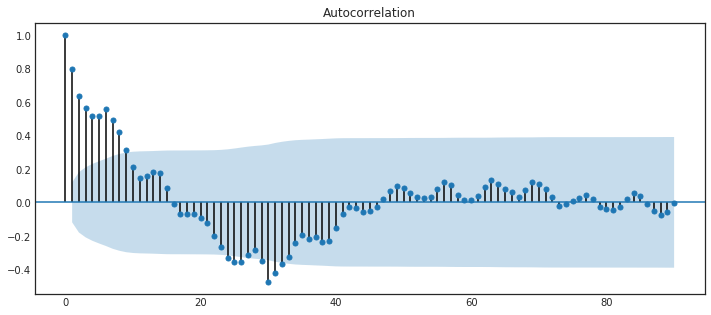

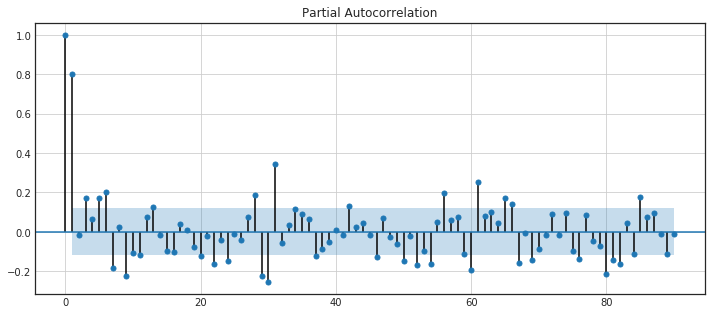

In [37]:
diff_series= currency.GEMS_GEMS_SPENT - currency.GEMS_GEMS_SPENT.shift(30)
stationary_check(diff_series[30:])

__This depicts third case of the tests:__

_Hence series is trend stationary, we remove the normal trend through differencing to make it strict stationary_

C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Dickey_Fuller Test Results [Ho=Series is Not Stationary] 
 Test Statistic :-4.772254733980625 
 P-Value :6.143716309255484e-05 
 Critical Values :{'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}


KPSS Test Result [Ho=Series is trend Stationary] 
 Test Statistic :0.03350595791397312 
 P-Value :0.1 
 Critical Values :{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


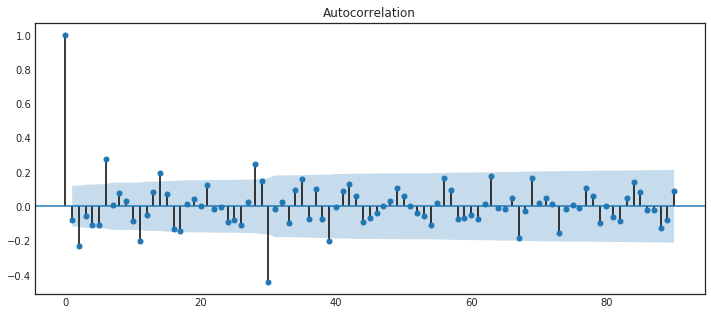

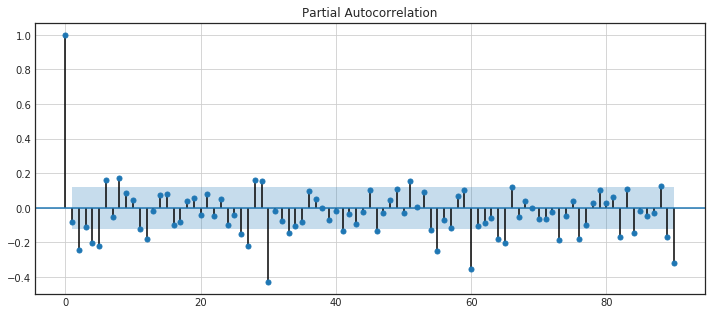

In [38]:
diff_series= diff_series.diff()
stationary_check(diff_series[31:])

__Now this series according to ADF is full stationary and according to KPSS is not trend stationary so it is full stationary__

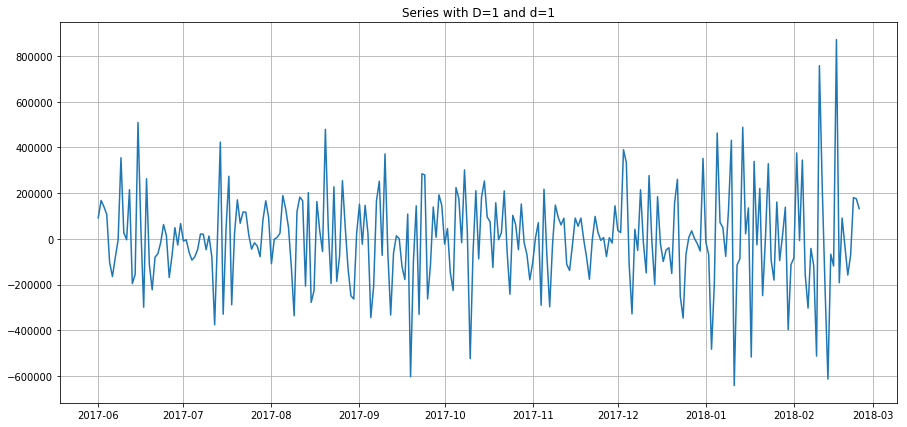

In [39]:
plt.figure(figsize=(15,7))
plt.plot(diff_series[31:])
plt.title('Series with D=1 and d=1')
plt.grid(True)

_This is clearly a series with no trend and seaosnality_

__Since this series had a strong seasonal component we should use SARIMA__

- $p$ is most probably 4 since it is the first significant one 
- $d$ equals 1 because we had first differences
- $q$ should be somewhere around 4 as well as seen on the ACF
- $P$ might be 3, since 30-th and 60-th and 90-th lags are somewhat significant on the PACF
- $D$ again equals 1 because we performed seasonal differentiation
- $Q$ is probably 1. The 30-th lag on ACF is significant while the 60-th is not.

In [40]:
# setting initial values and some bounds for them
ps = range(2, 4)
d=1 
qs = range(2, 4)
Ps = range(1, 3)
D=1 
Qs = range(0, 2)
s = 30 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)    ### cartesian multiplication of all
parameters_list = list(parameters)
len(parameters_list)

16

In [41]:
def optimize_SARIMA(parameters_list,d,D,s):
    
    result=[]
    best_aic=float()
    
    for p in parameters_list:
        
        try:
            model= sm.tsa.statespace.SARIMAX(currency.GEMS_GEMS_SPENT,order=(p[0],d,p[1]),seasonal_order=(p[2],D,p[3],s)).fit(display=-1)
            
        except:
            continue
            
        aic=model.aic
        
        if aic<best_aic:
            best_model=model
            best_aic=aic
            best_param=p
            
        result.append([model.aic,p])
        
    result_table= pd.DataFrame(result)
    result_table.columns= ['AIC Score','Parameters']
    result_table = result_table.sort_values(by='AIC Score', ascending=True).reset_index(drop=True)
    
    return result_table
    

In [42]:
result_table=optimize_SARIMA(parameters_list,1,1,30)

C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Us

In [43]:
result_table.head()

,AIC Score,Parameters
0,7242.205474,"(3, 3, 2, 1)"
1,7243.834703,"(3, 3, 2, 0)"
2,7249.236391,"(3, 3, 1, 1)"
3,7253.342600,"(2, 3, 2, 0)"
4,7254.022293,"(2, 3, 2, 1)"


In [44]:
p, q, P, Q = result_table.Parameters[0]

best_model=sm.tsa.statespace.SARIMAX(currency.GEMS_GEMS_SPENT, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                    GEMS_GEMS_SPENT   No. Observations:                  300
Model:             SARIMAX(3, 1, 3)x(2, 1, 1, 30)   Log Likelihood               -3611.099
Date:                            Fri, 02 Aug 2019   AIC                           7242.198
Time:                                    02:28:49   BIC                           7278.145
Sample:                                05-01-2017   HQIC                          7256.634
                                     - 02-24-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3482      0.172     -2.026      0.043      -0.685      -0.011
ar.L2         -0.3144      0.165   

C:\Users\ACER M5\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Dickey_Fuller Test Results [Ho=Series is Not Stationary] 
 Test Statistic :-6.202139392764923 
 P-Value :5.772794816952444e-08 
 Critical Values :{'1%': -3.452789844280995, '5%': -2.871421512222641, '10%': -2.5720351510944512}


KPSS Test Result [Ho=Series is trend Stationary] 
 Test Statistic :0.12957576304476284 
 P-Value :0.1 
 Critical Values :{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


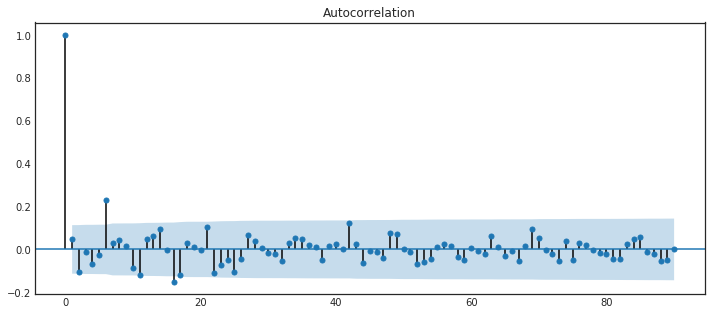

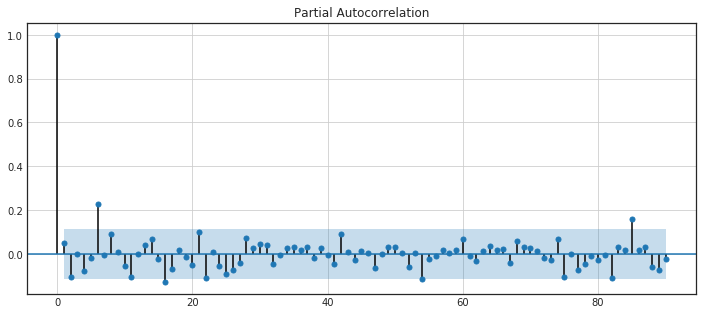

In [45]:
stationary_check(best_model.resid)

_So we can see residuals are stationary_



In [46]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')  ## from last point of data to last point of forecast
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True)
    
    

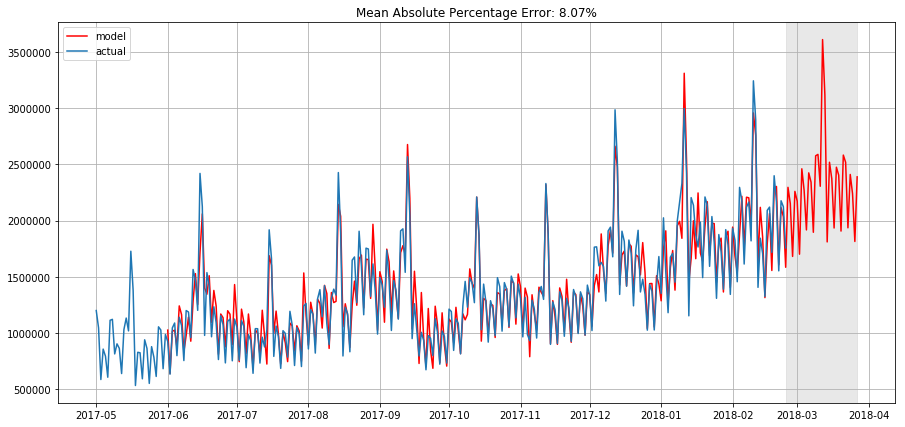

In [47]:
plotSARIMA(currency,best_model,30)

__In the end, we got very adequate predictions. Our model was wrong by 8.08% on average, which is very good. However, the overall costs of preparing data, making the series stationary, and selecting parameters might not be worth this accuracy.__

## Fb Prophet

__Now we are moving to Fb prophet.It is known for following reasons__


1. Seasonal effects caused by human behavior: weekly, monthly and yearly cycles, dips and peaks on public holidays.

2. Changes in trend due to new products and market events.

3. Outliers

### 3.4 Making a forecast

Prophet's API is very similar to the one you can find in `sklearn`. First we create a model, then call the method `fit`, and, finally, make a forecast. The input to the method `fit` is a `DataFrame` with two columns:
* `ds` (datestamp) must be of type `date` or `datetime`.
* `y` is a numeric value we want to predict.

To get started, we'll import the library and mute unimportant diagnostic messages:

In [5]:
from fbprophet import Prophet
df=currency.reset_index()
df.columns=['ds','y']
df.head()

,ds,y
0,2017-05-01,1199436
1,2017-05-02,1045515
2,2017-05-03,586111
3,2017-05-04,856601
4,2017-05-05,793775


In [6]:
predictions=60
train_df=df[:-predictions]

In [7]:
train_df.tail()

,ds,y
235,2017-12-22,1913008
236,2017-12-23,1364683
237,2017-12-24,1478238
238,2017-12-25,1342886
239,2017-12-26,1024933


In [8]:
m=Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


__Prophet.make_future_dataframe__

_make date values of future forecast_

In [9]:
future = m.make_future_dataframe(periods=predictions,include_history=True)    
future.tail(n=3)

,ds
297,2018-02-22
298,2018-02-23
299,2018-02-24


In [10]:
forecast= m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-01,923965.218251,551897.956052,1.450562e+06,923965.218251,923965.218251,91680.415893,91680.415893,91680.415893,91680.415893,91680.415893,91680.415893,0.0,0.0,0.0,1.015646e+06
1,2017-05-02,926431.570699,482834.636445,1.406692e+06,926431.570699,926431.570699,32455.692158,32455.692158,32455.692158,32455.692158,32455.692158,32455.692158,0.0,0.0,0.0,9.588873e+05
2,2017-05-03,928897.923146,461176.710398,1.351480e+06,928897.923146,928897.923146,-37991.950562,-37991.950562,-37991.950562,-37991.950562,-37991.950562,-37991.950562,0.0,0.0,0.0,8.909060e+05
3,2017-05-04,931364.275593,397730.407375,1.341091e+06,931364.275593,931364.275593,-61440.956192,-61440.956192,-61440.956192,-61440.956192,-61440.956192,-61440.956192,0.0,0.0,0.0,8.699233e+05
4,2017-05-05,933830.628041,471645.055089,1.328421e+06,933830.628041,933830.628041,-48692.595885,-48692.595885,-48692.595885,-48692.595885,-48692.595885,-48692.595885,0.0,0.0,0.0,8.851380e+05


In the resulting dataframe you can see many columns characterizing the prediction, including trend and seasonality components as well as their confidence intervals. The forecast itself is stored in the yhat column.

The Prophet library has its own built-in tools for visualization that enable us to quickly evaluate the result.

First, there is a method called Prophet.plot that plots all the points from the forecast

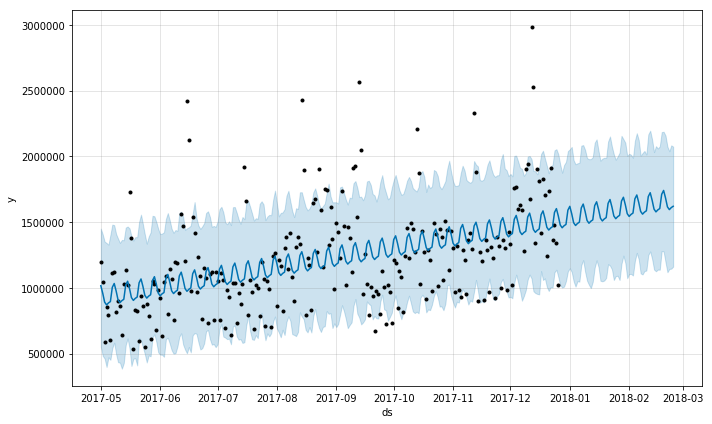

In [11]:
m.plot(forecast);

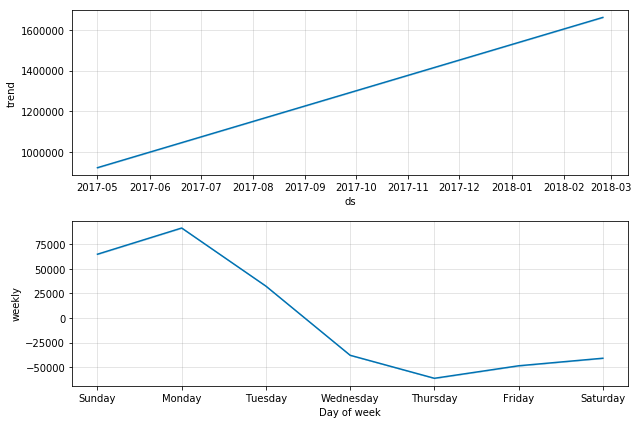

In [12]:
m.plot_components(forecast);

__Forecast Evaluation__

In [20]:
metrics(df['y'][:-predictions],forecast['yhat'][:-predictions])

R2_Score:0.19746296283916231 
 Mean_Absolute_Error:259542.97246945792 
 Median_Absolute_error:189690.84918159095 
 Mean_squared_Error:128430846731.60612
 Mean_squared_Log_Error:0.07586396951685126
 MAPE :22.260743807565447


In [26]:
def plotProphet(series,forecast,predictions_size):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted Prophet model
        n_steps - number of steps to predict in the future
        
    """
    error=mean_absolute_percentage_error(series[:-predictions_size],forecast[:-predictions_size])
    data_actual=series
    
    


    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast[-predictions_size:], color='r', label="model")
    plt.axvspan(data_actual.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')  ## from last point of data to last point of forecast
    plt.plot(data_actual, label="actual")
    plt.legend()
    plt.grid(True)
    
    

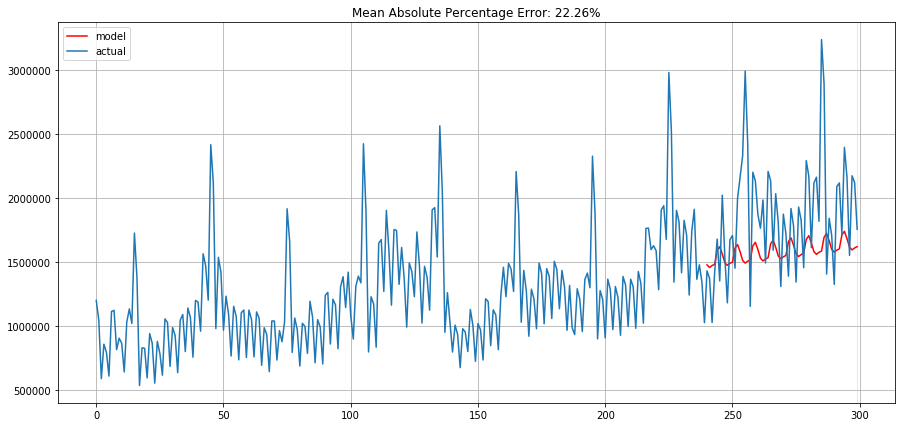

In [27]:
plotProphet(df['y'],forecast['yhat'],predictions_size=predictions)

__Note:
      Box-Cox Transformation can be applied to increase the MAPE__